# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### As you can see the dataset is in the form of an object similar to a `dictionay`. What are the `keys` of the dictionary?

In [6]:
print(str(iris.keys()))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### To have better understanding of the dataset, let's print it in tabular form.

In [7]:

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names']) 
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Figure below illustrates the features and target labels for iris dataset. 

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/iris.png" width="500" hight="300" />

#### What is the value of the key `data`? Assign the value to a variable `X`

In [8]:
X = iris['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### What is the `shape` of `X`?

In [9]:
X.shape

(150, 4)

#### What is the value of the key `target`? Assign the value to a variable `y`

In [10]:
y = iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### What is the `shape` of `y`?

In [11]:
y.shape

(150,)

#### What is the value of the key `target_names`? Assign the value to a variable `target_names`

In [12]:
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`

In [13]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Exploring and looping through the dataset

#### Print the 5th datapoint in your dataset `X`

In [15]:
print(X[4])

[5.  3.6 1.4 0.2]


#### Print the features and target label of flower 1 to 5.

In [16]:
for i in range(5):
    print(f"Index {i} -> features: {X[i]}, target: {y[i]} ({target_names[y[i]]})")

Index 0 -> features: [5.1 3.5 1.4 0.2], target: 0 (setosa)
Index 1 -> features: [4.9 3.  1.4 0.2], target: 0 (setosa)
Index 2 -> features: [4.7 3.2 1.3 0.2], target: 0 (setosa)
Index 3 -> features: [4.6 3.1 1.5 0.2], target: 0 (setosa)
Index 4 -> features: [5.  3.6 1.4 0.2], target: 0 (setosa)


#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`

In [ ]:
sepal_area = X[:, 0] * X[:, 1]
petal_area = X[:, 2] * X[:, 3]

for i in range(len(X)):
    print(f"Index {i} -> Sepal Area: {sepal_area[i]}, Petal Area: {petal_area[i]}")

Index 0 -> Sepal Area: 17.849999999999998, Petal Area: 0.27999999999999997
Index 1 -> Sepal Area: 14.700000000000001, Petal Area: 0.27999999999999997
Index 2 -> Sepal Area: 15.040000000000001, Petal Area: 0.26
Index 3 -> Sepal Area: 14.26, Petal Area: 0.30000000000000004
Index 4 -> Sepal Area: 18.0, Petal Area: 0.27999999999999997
Index 5 -> Sepal Area: 21.060000000000002, Petal Area: 0.68
Index 6 -> Sepal Area: 15.639999999999999, Petal Area: 0.42
Index 7 -> Sepal Area: 17.0, Petal Area: 0.30000000000000004
Index 8 -> Sepal Area: 12.76, Petal Area: 0.27999999999999997
Index 9 -> Sepal Area: 15.190000000000001, Petal Area: 0.15000000000000002
Index 10 -> Sepal Area: 19.980000000000004, Petal Area: 0.30000000000000004
Index 11 -> Sepal Area: 16.32, Petal Area: 0.32000000000000006
Index 12 -> Sepal Area: 14.399999999999999, Petal Area: 0.13999999999999999
Index 13 -> Sepal Area: 12.899999999999999, Petal Area: 0.11000000000000001
Index 14 -> Sepal Area: 23.2, Petal Area: 0.24
Index 15 ->

#### Find the `max`, `min`, `mean` and `median` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions.

In [19]:
feature_max = np.max(X, axis=0)
feature_min = np.min(X, axis=0)
feature_mean = np.mean(X, axis=0)
feature_median = np.median(X, axis=0)

print("feature max:", feature_max)
print("feature min:", feature_min)
print("feature mean:", feature_mean)
print("feature median:", feature_median)

feature max: [7.9 4.4 6.9 2.5]
feature min: [4.3 2.  1.  0.1]
feature mean: [5.84333333 3.05733333 3.758      1.19933333]
feature median: [5.8  3.   4.35 1.3 ]


# Plotting the data

#### `Box plot` of all features

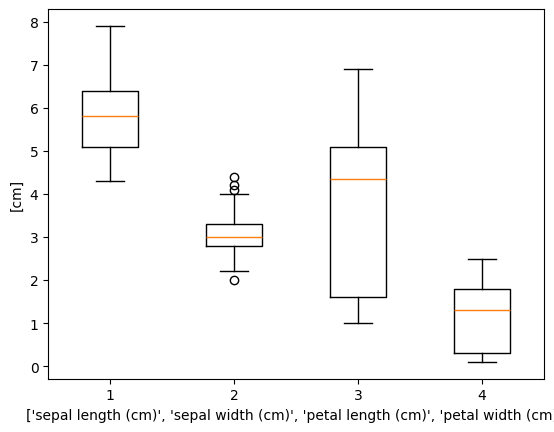

In [20]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Histogram of each feature

#### Plot the histogram of each feature. 

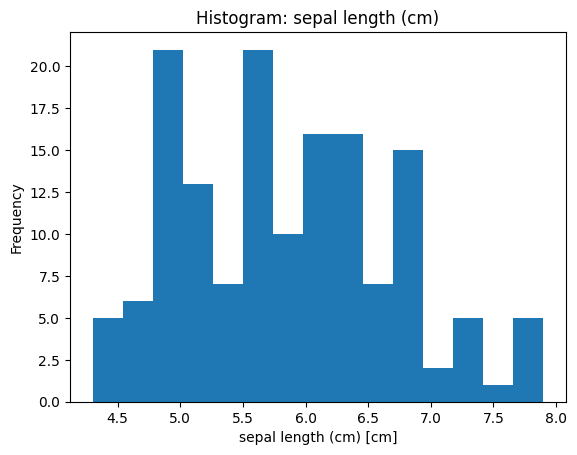

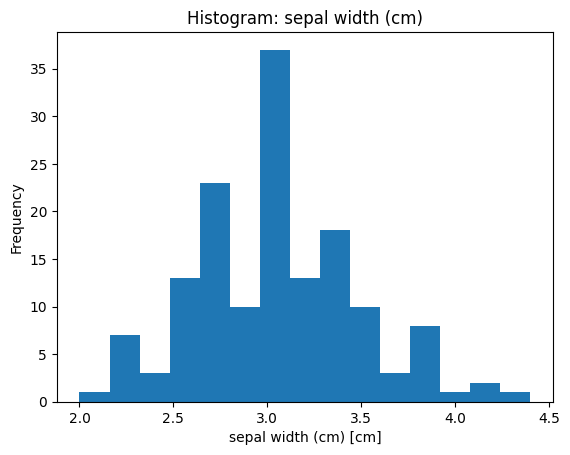

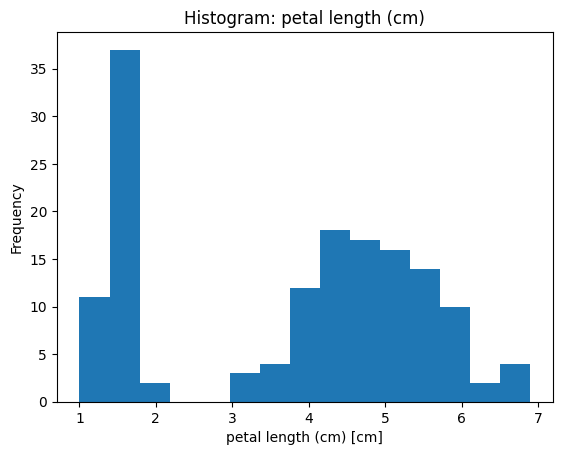

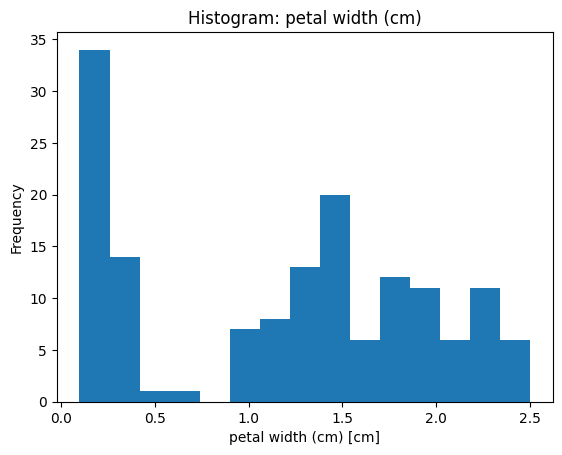

In [21]:
#your code here
for idx, fname in enumerate(feature_names):
    plt.figure()
    plt.hist(X[:, idx], bins=15)
    plt.xlabel(fname + " [cm]")
    plt.ylabel("Frequency")
    plt.title(f"Histogram: {fname}")
    plt.show()


#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features 
```python
(X[:,0], X[:,1]) 
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.
 

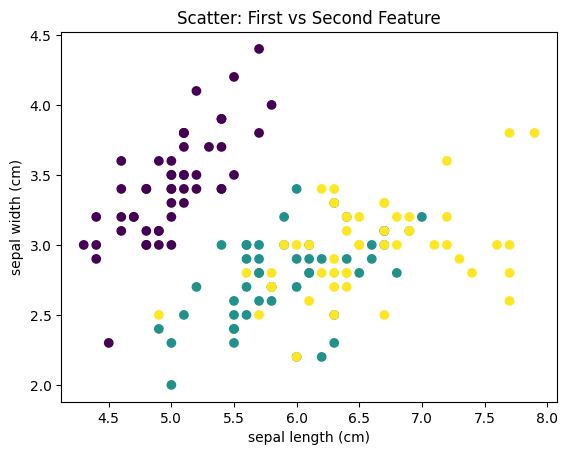

In [22]:
#your code here
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Scatter: First vs Second Feature")
plt.show()


(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

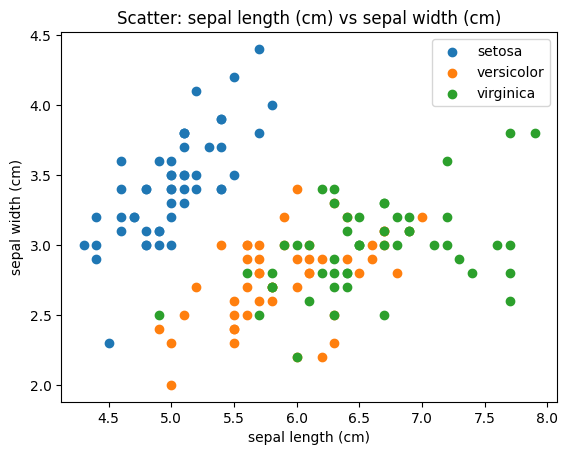

In [24]:
def plot_pair_with_legned(x1, x2, x1_label, x2_label, y_):
    plt.figure()
    for i, tname in enumerate(iris.target_names):
        plt.scatter(x1[y_ == i], x2[y_ == i], label=tname)
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.legend()
    plt.title(f"Scatter: {x1_label} vs {x2_label}")
    plt.show()

plot_pair_with_legned(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [25]:
def plot_pair(X1, X2, x1_label , x2_label, y):
    plt.figure()
    plt.scatter(X1, X2, c=y)
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.title(f"Scatter: {x1_label} vs {x2_label}")
    plt.show()

#### Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

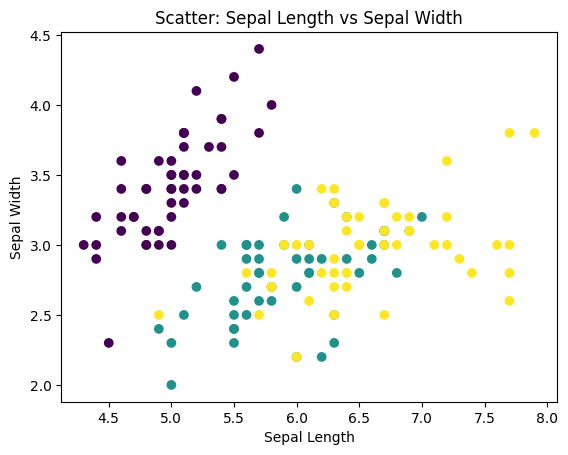

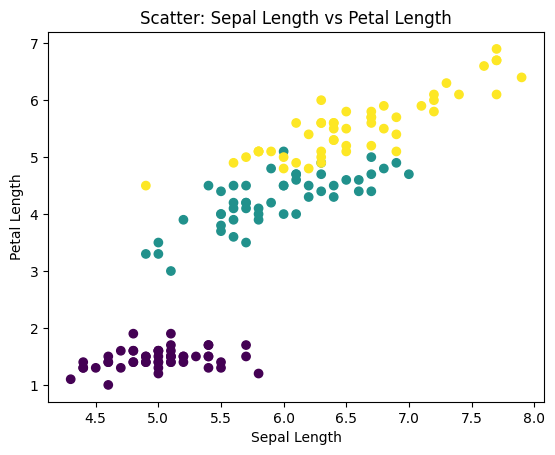

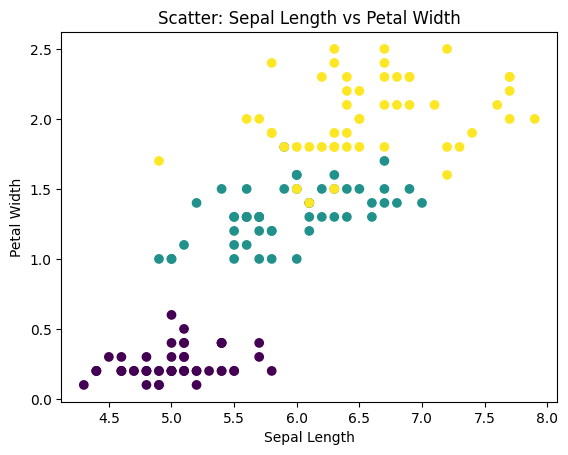

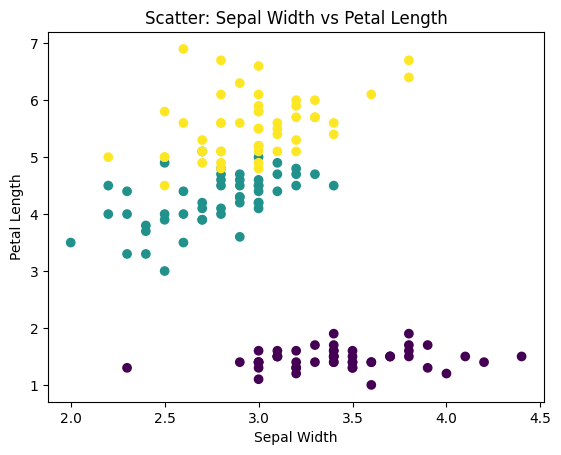

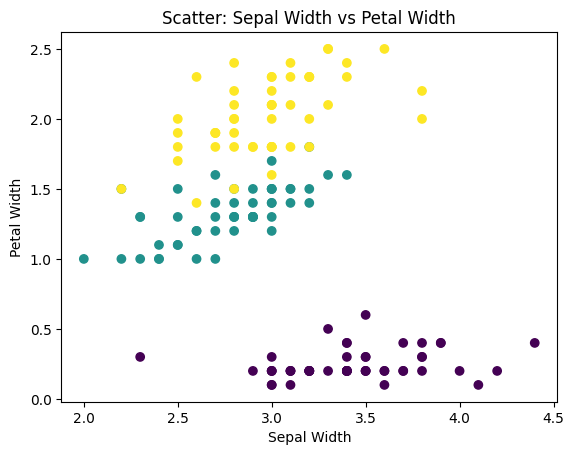

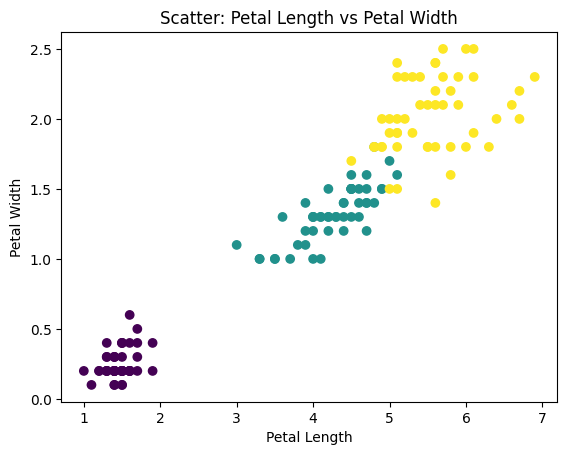

In [27]:
#your code here

pairs = [
  (X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'),
  (X[:,0], X[:,2], 'Sepal Length', 'Petal Length'),
  (X[:,0], X[:,3], 'Sepal Length', 'Petal Width'),
  (X[:,1], X[:,2], 'Sepal Width', 'Petal Length'),
  (X[:,1], X[:,3], 'Sepal Width', 'Petal Width'),
  (X[:,2], X[:,3], 'Petal Length', 'Petal Width'),
]

for X1, X2, l1, l2 in pairs:
    plot_pair(X1, X2, l1, l2, y)

# K Nearest Neighbors (KNN) 

## Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points. 

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

$
d(P_1, P_2) = \sqrt{(2 - 5)^2 + (2 - 5)^2}= \sqrt{18} \approx 4.2
$

We can calculate the distance between these two points.

In [28]:
P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
distance

np.float64(4.242640687119285)


#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [29]:
# Define two points in 3D space
P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


#### Write a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [31]:
def straight_line_distance(P, Q):
    P = np.asarray(P)
    Q = np.asarray(Q)
    return np.sqrt(np.sum((P - Q)**2))

P = np.array([2, 2])
Q = np.array([5, 5])
distance_2d = straight_line_distance(P, Q)
print("\n2D distance example (P=[2,2], Q=[5,5]):", distance_2d)

P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])
distance_3d = straight_line_distance(P1, P2)
print("3D distance example (P1=[1,2,3], P2=[4,0,8]):", round(distance_3d, 2))



2D distance example (P=[2,2], Q=[5,5]): 4.242640687119285
3D distance example (P1=[1,2,3], P2=[4,0,8]): 6.16


## KNN Algorithm Steps

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/knn2.jpg" width="600" hight="100" /> 

# Implementing KNN 

### 0 - Look at the data - Splitting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### What is the `shape` of `X_train`, `X_test`, `y_train`, `y_test`?

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 4), (75, 4), (75,), (75,))

### 1 - Calculate distances

#### Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set. 

#### So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [39]:
test_instance = X_test[0]

distances = [] # append the (index, distance) tuples to this list
for index, train_instance in enumerate(X_train):
    dist = straight_line_distance(train_instance, test_instance)
    distances.append((index, dist))

for index, dist in distances[:5]:
    print(f"Index {index} -> Distance: {dist}")

Index 0 -> Distance: 0.8124038404635955
Index 1 -> Distance: 1.438749456993816
Index 2 -> Distance: 1.0535653752852738
Index 3 -> Distance: 3.3674916480965473
Index 4 -> Distance: 1.8601075237738276


#### Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [ ]:
def calculate_distances(test_instance, X_train):
    #return distances 
    distances = []
    for index, train_instance in enumerate(X_train):
        dist = straight_line_distance(train_instance, test_instance)
        distances.append((index, dist))
    return distances



Example test_instance distances (first 3 after sort): [(34, np.float64(0.22360679774997896)), (45, np.float64(0.30000000000000027)), (28, np.float64(0.5099019513592785))]
Neighbor indices (k=3): [34, 45, 28]
Neighbor labels (k=3): [np.int64(1), np.int64(1), np.int64(1)]


#### What you pass as `input` to the function `calculate_distances`? What you get as `output` when you call this function?

Input:
test_instance: a single data point from the test set (shape: (4,) for the IRIS dataset)
X_train: the entire training dataset (shape: (n_train, 4))
Output:
A list of tuples in the format (index, distance) where:
index = index of a training sample
distance = Euclidean distance between the test sample and that training sample.

#### What is `shape` of `input` arrays to the function `calculate_distances`? What is the `shape` of `output`?

In [50]:
print(test_instance.shape)
print(X_train.shape)

distances_list = calculate_distances(test_instance, X_train)
print("\nShape of the output of calculate_distances function:", len(distances_list))
print("e.g. a list of length equal to the number of training samples (75 in this case).")

(4,)
(75, 4)

Shape of the output of calculate_distances function: 75
e.g. a list of length equal to the number of training samples (75 in this case).


### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [47]:
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

[(34, np.float64(0.22360679774997896)),
 (45, np.float64(0.30000000000000027)),
 (28, np.float64(0.5099019513592785)),
 (35, np.float64(0.5099019513592788)),
 (66, np.float64(0.5196152422706639)),
 (47, np.float64(0.5291502622129183)),
 (17, np.float64(0.5830951894845297)),
 (36, np.float64(0.6164414002968978)),
 (65, np.float64(0.6244997998398398)),
 (41, np.float64(0.6480740698407859)),
 (48, np.float64(0.6999999999999995)),
 (70, np.float64(0.7071067811865478)),
 (63, np.float64(0.728010988928052)),
 (23, np.float64(0.741619848709566)),
 (14, np.float64(0.754983443527075)),
 (68, np.float64(0.774596669241483)),
 (73, np.float64(0.7874007874011811)),
 (0, np.float64(0.8124038404635955)),
 (50, np.float64(0.8124038404635965)),
 (9, np.float64(0.8602325267042631)),
 (60, np.float64(0.9273618495495711)),
 (18, np.float64(0.9433981132056598)),
 (67, np.float64(0.9643650760992956)),
 (20, np.float64(0.9746794344808962)),
 (5, np.float64(0.9746794344808963)),
 (37, np.float64(1.00498756211

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [ ]:
k = 3
distances[:k]

[(34, np.float64(0.22360679774997896)),
 (45, np.float64(0.30000000000000027)),
 (28, np.float64(0.5099019513592785))]

#### Extract the index of the k nearest neighbors from (index, distance) tuples.

In [54]:
topk = distances[:k]
neighbor_index =[index for index, dist in topk]
neighbor_index

[34, 45, 28]

#### **Step 3:** Find the labels of these top k samples from y_train array.

In [53]:
neighbor_label = [y_train[i] for i in neighbor_index]
#your code here
neighbor_label

[np.int64(1), np.int64(1), np.int64(1)]

#### Now write a function `find_neighbors_label` to do all the steps above from 1 to 3. 

In [55]:
def find_neighbors_label(test_instance, X_train, y_train, k):
    """
        Inputs
        test_instance: One data point form test set
        X_train: train dataset
        y_train: train labels
        k: number of neighbours

        Output
        neighbor_label: list of k neighbours labels
    """
    #your code here
    #Calculate distances paird with index (index, distance)
    dlist = calculate_distances(test_instance, X_train)
    #Sort distances 
    dlist.sort(key=lambda x: x[1])
    #Get the k nearest neighbors index
    knn_idx = [idx for idx, _ in dlist[:k]]
    #Get the labels of the k nearest neighbors from y_train
    nlabels = [y_train[i] for i in knn_idx]
    return nlabels
    #return neighbor_label


#### What you pass as `input` to the function `find_neighbors`? What you get as `output` when you call this function?

input: 
test_instance: one test data point (shape (4,))
X_train: training dataset (shape (75, 4))
y_train: training labels (shape (75,))
k: number of nearest neighbors (e.g., 3)
Output:
A list of length k containing the labels of the k nearest neighbors of the test instance.

#### What is `shape` of `input` arrays to the function `find_neighbors`? What is the `shape` of `output`?

In [ ]:
print("\nfind_neighbors_label inputs: test_instance shape =", test_instance.shape, 
      ", X_train shape =", X_train.shape, ", y_train shape =", y_train.shape, ", k =", k)

example_neighbors = find_neighbors_label(test_instance, X_train, y_train, k)
print("find_neighbors_label output (labels list, length k):", example_neighbors, "length:", len(example_neighbors))



find_neighbors_label inputs: test_instance shape = (4,) , X_train shape = (75, 4) , y_train shape = (75,) , k = 3
find_neighbors_label output (labels list, length k): [np.int64(1), np.int64(1), np.int64(1)] length: 3


#### Explain what operations  are done inside the function `find_neighbors`  to calculate the label of k nearest neighbors?

1. Compute distances:
The Euclidean distance between the test instance and each sample in X_train is calculated and stored as (index, distance) tuples.
2. Sort distances:
The list of tuples is sorted in ascending order based on the distance value, so the nearest neighbors appear first.
3. Select top k neighbors:
The first k tuples are chosen from the sorted list (these represent the k closest training samples).
4. Extract labels:
Using the indices from those top k neighbors, the corresponding labels are fetched from y_train.
5. Return labels:
The function returns the list of k labels for later voting.

### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [57]:
def vote_on_labels(neighbor_label):
    label_to_num_of_occurance = {}
    for label in neighbor_label:
        label_to_num_of_occurance[label] = label_to_num_of_occurance.get(label, 0) + 1

    prediction = max(label_to_num_of_occurance.items(), key=lambda x: x[1]) # find the label with max occurance (label, num_of_occurance)
    return prediction[0] # return the label form the (label, num_of_occurance) tuple

(optional) This is another way to implement the function - Scikit learn uses this method

In [ ]:
# import scipy.stats
# def vote_on_labels(neighbor_label):
#     prediction = scipy.stats.mode(neighbor_label)
#     return prediction[0]

In [58]:
y_pred = vote_on_labels(neighbor_label)
y_pred

np.int64(1)

#### What you pass as `input` to the function `vote_on_label`? What you get as `output` when you call this function?

Input:
A list of labels of the k nearest neighbors
Output:
A single label (int), the most frequent label among the neighbors.


#### What is `shape` of `input` arrays to the function `vote_on_label`? What is the `shape` of `output`?

Shape of input:
A 1D list or array of length k → e.g., (k,)
Shape of output:
A single scalar value:  ()

### 4 - put it all together

#### Now iterate over all datapoints of `X_test` and calculate their label.

In [59]:
y_pred = []
#your code here
for i in range(len(X_test)):
    nl = find_neighbors_label(X_test[i], X_train, y_train, k)
    pred = vote_on_labels(nl)
    y_pred.append(pred)
y_pred = np.array(y_pred)

#### Turn code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [60]:
def KNN(X_train, y_train, X_test, k):
    preds = []
    for i in range(len(X_test)):
        nl = find_neighbors_label(X_test[i], X_train, y_train, k)
        pred = vote_on_labels(nl)
        preds.append(pred)
    return np.array(preds)

#### What is the `shape` of the `input` to the function `KNN`? What is the `shape` of the `output`?

In [61]:
y_pred_fn = KNN(X_train, y_train, X_test, k)

print("\nKNN input shapes:",
      "X_train:", X_train.shape, "y_train:", y_train.shape, "X_test:", X_test.shape, "k:", k)
print("KNN output shape:", y_pred_fn.shape)


KNN input shapes: X_train: (75, 4) y_train: (75,) X_test: (75, 4) k: 3
KNN output shape: (75,)


#### Explain which functions you defined from previous steps are used in `KNN` function?

your answer here

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [63]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [64]:
accuracy = sum(y_test == y_pred) / len(y_test) #takes True as 1 and False as 0
print(f"accuracy: {accuracy * 100} %")

accuracy: 97.33333333333334 %


#### Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [65]:
def evaluate(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = evaluate(y_test, y_pred_fn)
print(f"Custom KNN accuracy (k={k}): {acc * 100:.2f}%")

Custom KNN accuracy (k=3): 97.33%


#### (Optional) 6 - Hyperparameter tuning

### So far we have used k =3 for number of nearest neighbours. Find the best value of `k` for the KNN algorithm on your dataset.

Helper: Find the accuracy of the model for different values of `k` and plot the accuracy vs `k` to find the best value of `k`.

In [66]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []
# your code here
for kk in K:
    preds = KNN(X_train, y_train, X_test, kk)
    a = evaluate(y_test, preds)
    my_accs.append(a)

# KNN in Scikit-Learn

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/Scikit-learn-flow.jpeg" width="500" hight="400" />

In [67]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.33%
